Instituto Tecnológico de Costa Rica <br>
Escuela de Ingeniería en Electrónica <br>
Maestría en Electrónica con énfasis en Sistemas Embebidos <br>
Curso: Reconocimiento de Patrones - II Cuatrimestre 2019 <br>
Profesor: MSc.Felipe Meza <br>
Estudiante: José Pablo Vernavá Amador (Carnet 200307876) <br>

# Investigación Corta 2

## Preparación del set de datos

El set de datos que utilicé corresponde a uno sobre la calidad del vino rojo del norte de Portugal, y sirve para modelar la calidad del vino con base en pruebas físico-químicas. 

Empecemos por importar la biblioteca de *pandas* para realizar el manejo del set de datos:

In [72]:
import pandas as pd

El set de datos se encuentra disponible en el siguiente link, de donde hacemos la carga de los datos a una tabla de datos:

In [73]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wineData=pd.read_csv(url,sep=";")

El tamaño del set de datos es:

In [74]:
wineData.shape

(1599, 12)

Veamos las primeras 5 instancias de la tabla para ver como están conformados los datos:

In [75]:
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


En primer lugar, vemos que todos los atributos son numéricos.  La salida que queremos predecir es la calidad del vino (columna "quality") utilizando el resto de atributos de las características físicas y quimicas.

Veamos si hay valores *NaN* en la tabla: 

In [76]:
wineData.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No hay filas que eliminar. <br>

Analicemos un poco más la salida "quality".  Empecemos por ver su tipo de datos:

In [77]:
wineData['quality'].dtype

dtype('int64')

Vemos que son valores enteros. Ahora veamos que valores hay en la columna "quality" y en que cantidad:

In [78]:
wineData.groupby(['quality']).size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

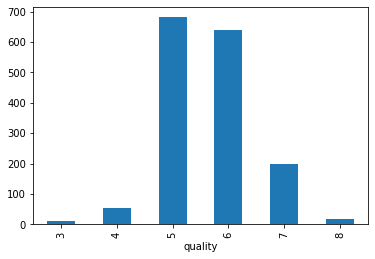

In [79]:
wineData.groupby(['quality']).size().plot(kind='bar')

Vemos que predominan los valores 5 y 6, que podrían ser considerados de calidad "normal". Valores de calidad menores a 5 serán considerados vinos de baja calidad y valores mayores a 6 vinos de buena calidad. Entonces clasifiquemos la calidad de los vinos de esa forma:

In [80]:
wineData.loc[wineData['quality'] < 5, 'quality'] = 0

In [81]:
wineData.loc[(wineData['quality'] > 4) & (wineData['quality'] < 7), 'quality'] = 1

In [82]:
wineData.loc[wineData['quality'] > 6, 'quality'] = 2

In [83]:
wineData.groupby(['quality']).size()

quality
0      63
1    1319
2     217
dtype: int64

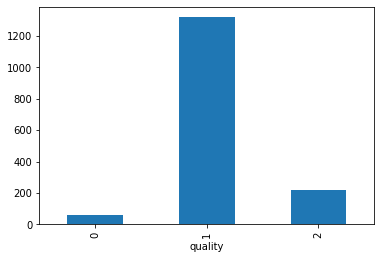

In [84]:
wineData.groupby(['quality']).size().plot(kind='bar')

Ahora dividamos el set de datos en "label" (valores de salida) y "features" (atributos utilizados para predecir los valores "label"):

In [14]:
label=wineData['quality'] # la columna quality es nuestra salida

In [15]:
features=wineData.drop('quality', axis=1) # eliminamos la columna 'quality' y el resto de la tabla son los features

## Partición de los datos en training y testing:

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features,label, random_state=13)

Los tamaños de los sets de entrenamiento y de pruebas:

In [86]:
print(f"tamaño X_train es {X_train.shape}")
print(f"tamaño X_test es {X_test.shape}")
print(f"tamaño y_train es {y_train.shape}")
print(f"tamaño y_test es {y_test.shape}")

tamaño X_train es (1199, 11)
tamaño X_test es (400, 11)
tamaño y_train es (1199,)
tamaño y_test es (400,)


Vemos que el set de entrenamiento corresponde al 75% de los datos y el set de pruebas al 25%.

Ahora apliquemos los diferentes modelos de aprendizaje automatico supervisado.  Debido a que nuestra salida son valores discretos (0, 1 o 2), se utilizan modelos de clasificación.

## 1. Decision Tree Classification

Los arboles de decisión aprenden de los datos usando decisiones del tipo "if-else". El modelo va dividiendo un set de datos en subconjuntos cada vez mas pequenos, y al mismo tiempo un árbol de decisión asociado se va desarrollando incrementalmente.

En un Decision Tree, el parametro max_depth determina la máxima profundidad del árbol. El valor por defecto es None, es decir que el árbol sigue aumentando hasta alcanzar que el árbol solo tenga hojas (leaf_nodes). Al utilizar max_depth como None, es común que el algoritmo termine siendo over-fitted. Al utilizar un valor para max_depth se limita como crece el árbol y se previene el over-fit.

Hagamos un barrido únicamente de max_depth, primero un barrido amplio para ver el comportamiento general y luego lo ajustamos:

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
training_accuracy=[]
test_accuracy=[]
max_depth_settings = range(1, 51) # variar max_depth desde 1 a 50
for n_max_depth in max_depth_settings:
    # se construye el modelo de clasificacion
    DecisionTreeModel = DecisionTreeClassifier(max_depth=n_max_depth,random_state=13)
    DecisionTreeModel.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(DecisionTreeModel.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(DecisionTreeModel.score(X_test, y_test))

Ahora procedemos a graficar la exactitud de las pruebas y del entrenamiento contra el valor de *max_depth*:

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

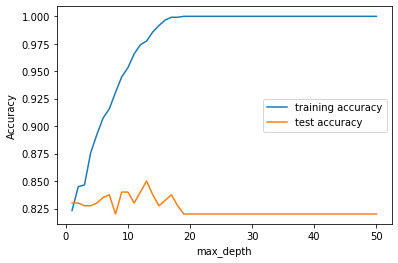

In [91]:
plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

Vemos que hay un caso de overfitting cuando "max_depth" aumenta, donde el error de entrenamiento disminuye hasta llegar a ser cero, y en cambio, el error de pruebas aumenta hasta estabilizarse.  Esto es lo que esperabamos. 

Hagamos un barrido de max_depth mas estrecho, de 1 a 20. 

In [26]:
training_accuracy=[]
test_accuracy=[]
max_depth_settings = range(1, 21) # variar max_depth desde 1 a 20
for n_max_depth in max_depth_settings:
    # se construye el modelo de clasificacion
    DecisionTreeModel = DecisionTreeClassifier(max_depth=n_max_depth,random_state=13)
    DecisionTreeModel.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(DecisionTreeModel.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(DecisionTreeModel.score(X_test, y_test))

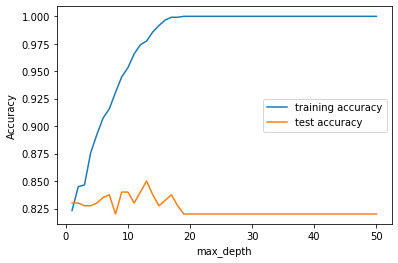

In [92]:

plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

Vemos como se afecta el valor de *test accuracy*. Podemos tabular los valores de la siguiente forma:

In [93]:
resultsDF=pd.DataFrame({ 'max_depth_value': max_depth_settings, 'training_accuracy': training_accuracy, 'test_accuracy': test_accuracy }) 
resultsDF

,max_depth_value,training_accuracy,test_accuracy
0,1,0.823186,0.8300
1,2,0.844871,0.8300
2,3,0.846539,0.8275
3,4,0.875730,0.8275
4,5,0.892410,0.8300
5,6,0.907423,0.8350
6,7,0.915763,0.8375
7,8,0.930776,0.8200
8,9,0.944954,0.8400
9,10,0.953294,0.8400


Para obtener que valores de *max_depth* nos da el mejor *test accuracy* podemos utilizar:

In [94]:
resultsDF.loc[resultsDF['test_accuracy'].idxmax(),:]

max_depth_value      13.000000
training_accuracy     0.977481
test_accuracy         0.850000
Name: 12, dtype: float64

De acá vemos que obtenemos una exactitud máxima de 85% cuando max_depth = 13.  El *training accuracy* para este valor de *max_depth* es 97.7481%. 

## 2. k Neareast Neighbors Classification

La clasificación basada en vecinos es un tipo de aprendizaje basado en instancias, o aprendizaje no generalizado.  Es decir, el modelo no intenta construir un modelo interno general, si no que simplemente almacena instancias del set de entrenamiento.  La clasificación se lleva a cabo utilizando el mayor numero de vecinos en cada punto. 

El algoritmo _kNeighborsClassifier_ implementa el aprendizaje basado en el valor _k</t>_ de vecinos mas cercanos en cada punto, donde _k</t>_ es un valor dado por el usuario.  El valor optimo de _k</t>_ es muy dependiente de los datos, y en general, un _k</t>_ mas grande elimina el efecto del ruido, pero hace los limites de la clasificacion menos diferentes.

Hagamos un barrido entonces de _k</t>_ para ver su efecto en la exactitud para este set de datos:

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
training_accuracy=[]
test_accuracy=[]
neighbors_settings = range(1, 100)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))

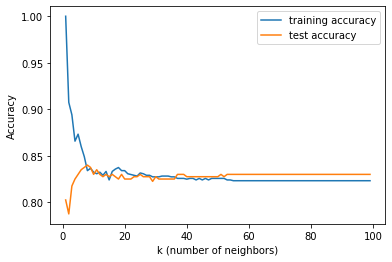

In [97]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k (number of neighbors)")
plt.legend()

Parece que con un valor de k entre 1 y 20 se produce la máxima exactitud para el set de pruebas. Hagamos un barrido más estrecho esta vez:

In [98]:
training_accuracy=[]
test_accuracy=[]
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))

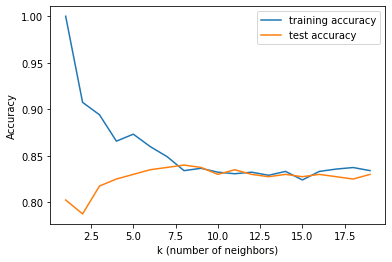

In [99]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k (number of neighbors)")
plt.legend()

Para encontrar el valor de _k</t>_ exacto: 

In [100]:
resultsDF=pd.DataFrame({ 'k': neighbors_settings, 'training_accuracy': training_accuracy, 'test_accuracy': test_accuracy }) 
resultsDF

,k,training_accuracy,test_accuracy
0,1,1.000000,0.8025
1,2,0.907423,0.7875
2,3,0.894078,0.8175
3,4,0.865721,0.8250
4,5,0.873228,0.8300
5,6,0.859883,0.8350
6,7,0.849041,0.8375
7,8,0.834028,0.8400
8,9,0.836530,0.8375
9,10,0.832360,0.8300


In [101]:
resultsDF.loc[resultsDF['test_accuracy'].idxmax(),:]

k                    8.000000
training_accuracy    0.834028
test_accuracy        0.840000
Name: 7, dtype: float64

Y logramos ver que para k=8, obtenemos la máxima exactitud de pruebas de 84%. Además, un valor de exactitud de 83.4%. Me parece un modelo balanceado.

Otra forma de optimizar el algoritmo es utilizando "Grid Search", que encuentra el valor de los parámetros que produce el puntaje más alto. 

In [102]:
from sklearn.model_selection import GridSearchCV
kNN_model = KNeighborsClassifier(n_jobs=-1)
# Set de hiper Parametros 
parameters = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
# Hacer modelos utilizando los hiper parametros anteriores
grid_kNN = GridSearchCV(kNN_model, param_grid=parameters, n_jobs=1)
# Utilizar el modelo para aprender
grid_kNN.fit(X_train,y_train)

C:\Users\amadorj\AppData\Local\Continuum\miniconda3\envs\Inv-Corta-2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 5], 'n_jobs': [-1],
                         'n_neighbors': [5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [103]:
# Por medio de "best_params_" obtenemos los valores de 
# los parametros que producen el mejor score
print("Mejores hiper parametros:\n",grid_kNN.best_params_)


Mejores hiper parametros:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}


En esto caso, vemos que GridSearch determinó que k = 10, da el mejor score.

In [104]:
# Prediccion
prediction=grid_kNN.predict(X_test)
# importar clase metrics
from sklearn import metrics
# evaluacion(Accuracy score)
print("Exactitud:",metrics.accuracy_score(prediction,y_test))


Exactitud: 0.88


Vemos que la exactitud pruebas aumentó a 88%.

## 3. Gaussian Naive Bayes

Los metodos Naive Bayes son un set de algoritmos de aprendizaje supervisado basados en el teorema de Bayes con la suposición "ingenua" de independencia condicional entre cada par de atributos de entrada, dado el valor de la variable de clase.

In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
nbg = GaussianNB()

In [107]:
nbg

GaussianNB(priors=None, var_smoothing=1e-09)

In [108]:
nbg.fit(X_train, y_train)
print("Training set score: {:.3f}".format(nbg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(nbg.score(X_test, y_test)))

Training set score: 0.783
Test set score: 0.807


## 4. C-Support Vector Classification

Las "Support Vector Machines" (SVM) no solo encuentran el limite de decisión, si no que escoje el más óptimo, es decir el que tenga el máximo margen de los puntos más cercanos de todas las clases.

La clasificación C-Support Vector utiliza el hiper parametro C, que controla el compromiso entre un limite de decisión suave y clasificar los puntos de entrenamiento correctamente.  Un valor alto de C significa que vamos a obtener más puntos de entrenamiento correctos.     

In [109]:
from sklearn.svm import SVC

In [110]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.87
Accuracy on test set: 0.83


In [111]:
training_accuracy=[]
test_accuracy=[]
C_settings = range(1, 200)
for c_value in C_settings:
    # se construye el modelo de clasificacion
    clf = SVC(C=c_value,gamma='auto')
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))

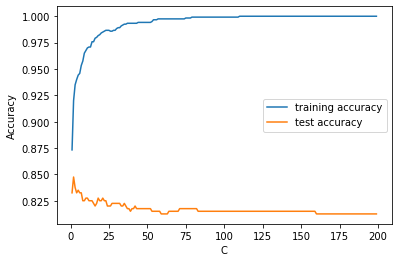

In [112]:
plt.plot(C_settings, training_accuracy, label="training accuracy")
plt.plot(C_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

Como se esperaba, al aumentar C, tenemos mejor exactitud de entrenamiento. Sin embargo, disminuye la exactitud de pruebas (over-fit).

In [113]:
training_accuracy=[]
test_accuracy=[]
C_settings = range(1, 200)
for c_value in C_settings:
    # se construye el modelo de clasificacion
    clf = SVC(C=c_value,gamma='auto')
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))

In [114]:
resultsDF=pd.DataFrame({ 'C': C_settings, 'training_accuracy': training_accuracy, 'test_accuracy': test_accuracy }) 

In [115]:
resultsDF.loc[resultsDF['test_accuracy'].idxmax(),:]

C                    2.000000
training_accuracy    0.919933
test_accuracy        0.847500
Name: 1, dtype: float64

Con un valor alto del hiper parametro _gamma_, el limite de decisión va a ser dependiente de los puntos que están muy cerca de la linea limite, lo que resulta en ignorar los puntos que están lejos del limite de decisión. Esto porque los puntos más cercanos obtienen más peso y resulta en una linea mas curva.  Por el contrario, si el valor de gamma es bajo, entonces los puntos mas lejanos obtienen peso considerable y obtenemos una linea más recta.

Variemos gamma con C=2:

In [116]:
training_accuracy=[]
test_accuracy=[]
gamma_settings = [0.1,1,10,100]
for gamma_value in gamma_settings:
    # se construye el modelo de clasificacion
    clf = SVC(C=2,gamma=gamma_value)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))

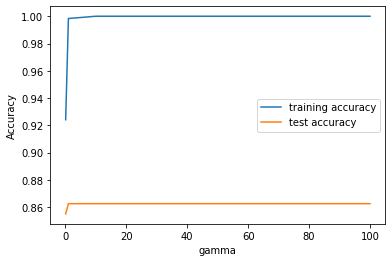

In [117]:
plt.plot(gamma_settings, training_accuracy, label="training accuracy")
plt.plot(gamma_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("gamma")
plt.legend()

In [118]:
resultsDF=pd.DataFrame({ 'gamma': gamma_settings, 'training_accuracy': training_accuracy, 'test_accuracy': test_accuracy }) 

In [119]:
resultsDF.loc[resultsDF['test_accuracy'].idxmax(),:]

gamma                1.000000
training_accuracy    0.998332
test_accuracy        0.862500
Name: 1, dtype: float64

Entonces con C=2, gamma=1, obtenemos test accuracy de 86.25%.

## 5. Gaussian process classification (GPC)

La GPC esta basada en la aproximación de Laplace. Es un método de clasificación no perimétrico.

In [120]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [121]:
gpc=GaussianProcessClassifier()
gpc

GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=100,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=False)

In [122]:
gpc.fit(X_train, y_train)
print("Training set score: {:.3f}".format(gpc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gpc.score(X_test, y_test)))

Training set score: 0.983
Test set score: 0.838


In [123]:
training_accuracy=[]
test_accuracy=[]
max_iter_predict_range = [1,10,20,30,50,80, 100]
for max_iter_predict_value in max_iter_predict_range:
    # se construye el modelo de clasificacion
    gpc = GaussianProcessClassifier(max_iter_predict=max_iter_predict_value)
    gpc.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(gpc.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(gpc.score(X_test, y_test))

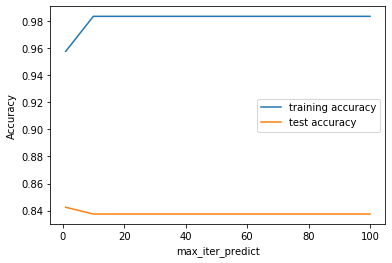

In [124]:
plt.plot(max_iter_predict_range, training_accuracy, label="training accuracy")
plt.plot(max_iter_predict_range, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_iter_predict")
plt.legend()

De acá vemos que más bien con un valor de "max_iter_predict" de 1 se obtiene mejor puntuación.

In [125]:
gpc=GaussianProcessClassifier(max_iter_predict=1)
gpc.fit(X_train, y_train)
print("Training set score: {:.3f}".format(gpc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gpc.score(X_test, y_test)))

Training set score: 0.957
Test set score: 0.843


## 6. Método tipo ensamble: Bagging meta-estimator

Los metodos tipo ensamble usan múltiples algoritmos de aprendizaje para obtener un mejor rendimiento predictivo del que obtendrían de cualquiera de los algoritmos constituyentes por si solos.  Este tipo de metodos combinan varias hipotesis en lugar de solo una, por lo tanto requieren de mas poder computacional que evaluar la predicción de un solo modelo.  

Los ensambles pueden tener mayor flexibilidad en las funciones que pueden representar.  Sin embargo, esta flexibilidad puede, en teoría, llevar a over-fit el set de entrenamientos mas que un modelo único podría, pero en la practica, algunas técnicas de ensamble tienden a reducir los problemas relacionados al over-fit del set de entrenamiento. 

Empíricamente, los ensambles tienden a producir mejores resultados cuando una diversidad significativa entre los modelos que lo constituyen. 

El modelo "Bagging meta-estimator", es un meta-algoritmo tipo ensamble diseñado para mejorar la estabilidad y la exactitud de los algoritmos utilizados como parte del ensamble. 

Los metodos "bagging" forman una clase de algoritmos que construyen varias instancias de un estimador caja negra en subconjuntos aleatorios del set de datos de entrenamiento original y luego agregan sus predicciones individuales para formar una predicción final.  Mejoran la varianza de un estimador base al introducir aleatoriedad

In [126]:
from sklearn.ensemble import BaggingClassifier

In [127]:
 bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)

In [128]:
bagging.fit(X_train, y_train)
print("Training set score: {:.3f}".format(bagging.score(X_train, y_train)))
print("Test set score: {:.3f}".format(bagging.score(X_test, y_test)))

Training set score: 0.840
Test set score: 0.835


In [129]:
training_accuracy=[]
test_accuracy=[]
max_samples_range = [10,20,30,40,50]
for max_samples_value in max_samples_range:
    # se construye el modelo de clasificacion
    bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=max_samples_value, max_features=0.5)
    bagging.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(bagging.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(bagging.score(X_test, y_test))

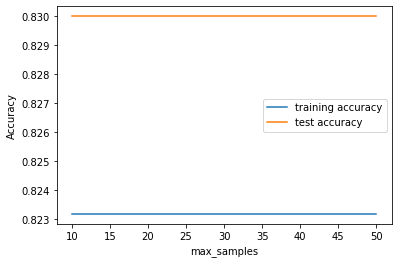

In [130]:
plt.plot(max_samples_range, training_accuracy, label="training accuracy")
plt.plot(max_samples_range, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_samples")
plt.legend()